In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('data-kiem-tra-2.csv')
df.head(10)

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,10.05.2013,4,58,3773,299.0,1
1,26.05.2013,4,58,3768,249.0,1
2,19.05.2013,4,58,4036,419.0,1
3,25.05.2013,4,58,12878,149.0,1
4,15.05.2013,4,58,12885,148.0,1
5,15.05.2013,4,58,12886,148.0,1
6,15.05.2013,4,59,2678,499.5,1
7,26.05.2013,4,59,2458,299.0,1
8,25.05.2013,4,59,2447,1999.0,1
9,15.05.2013,4,59,2447,1998.5,1


In [84]:
df.shape

(550038, 6)

In [85]:
df.columns

Index(['date', 'truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5'], dtype='object')

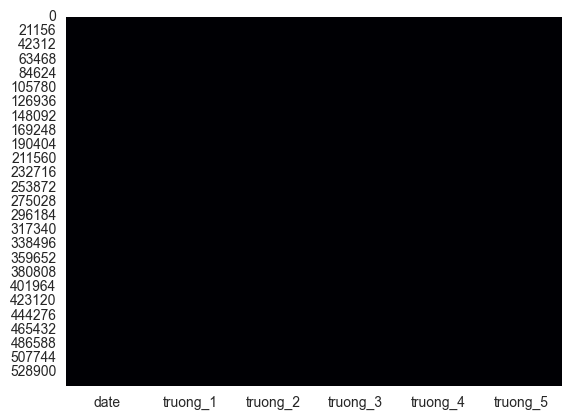

In [86]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [90]:
# Chuyển đổi cột 'date' thành kiểu datetime
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Sắp xếp dữ liệu theo thứ tự ngày tháng
df = df.sort_values(by='date')

# Xóa các dòng trùng lặp
df = df.drop_duplicates(subset=['date', 'truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5'], keep='first')

# Đánh số thứ tự cho các dòng
df = df.reset_index(drop=True)

# Gộp các giá trị cùng ngày và tính trung bình
cols = ['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']
df_mean = df.groupby(df['date'])[cols].mean().reset_index()

# In ra kết quả
df_mean

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-05-01,4.0,15.0,3476.0,799.0,1.0
1,2013-05-02,4.0,43.0,19906.0,549.0,1.0
2,2013-05-03,4.0,57.0,16986.0,199.0,1.0
3,2013-05-04,4.0,5.0,12169.0,649.0,1.0
4,2013-05-05,4.0,3.0,3468.0,149.0,1.0
...,...,...,...,...,...,...
209,2013-11-26,10.0,29.0,2252.0,599.0,1.0
210,2013-11-27,10.0,41.0,11081.0,149.0,1.0
211,2013-11-28,10.0,28.0,5573.0,599.0,1.0
212,2013-11-29,10.0,35.0,3108.0,299.0,1.0


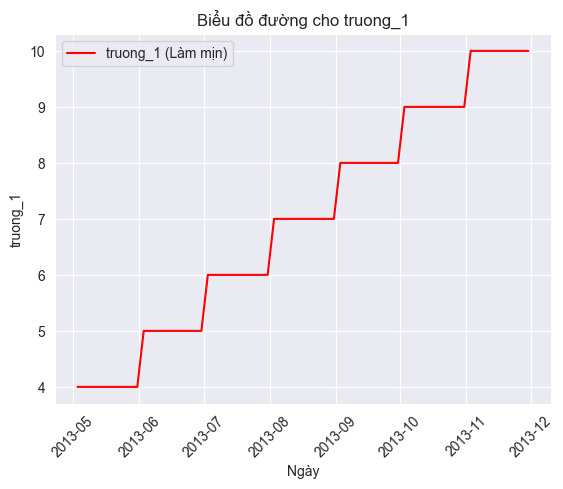

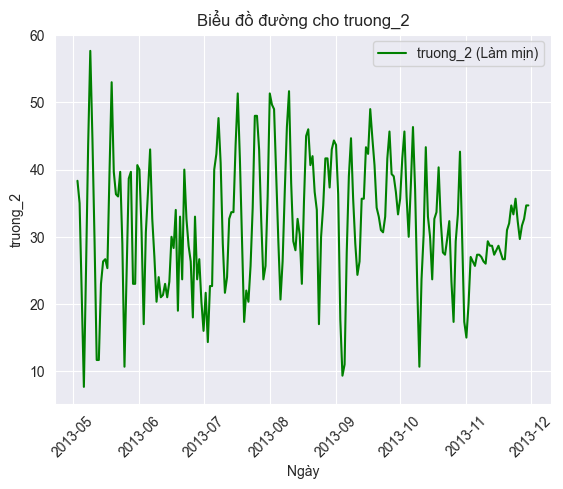

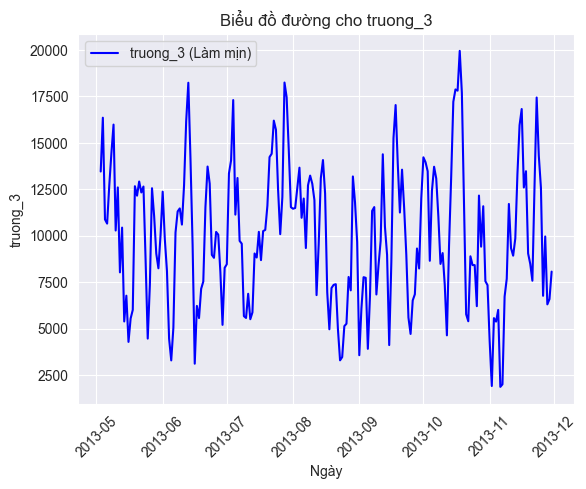

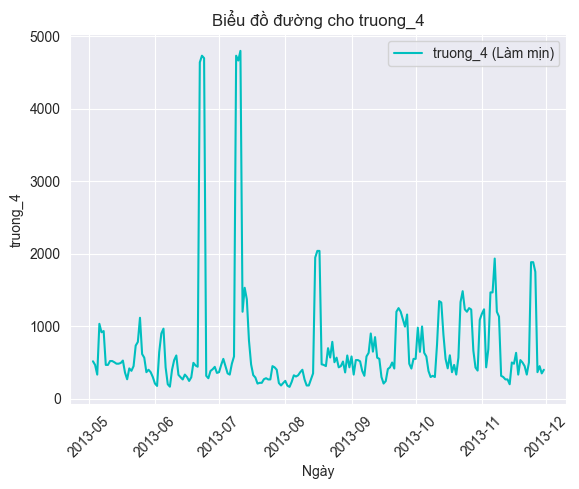

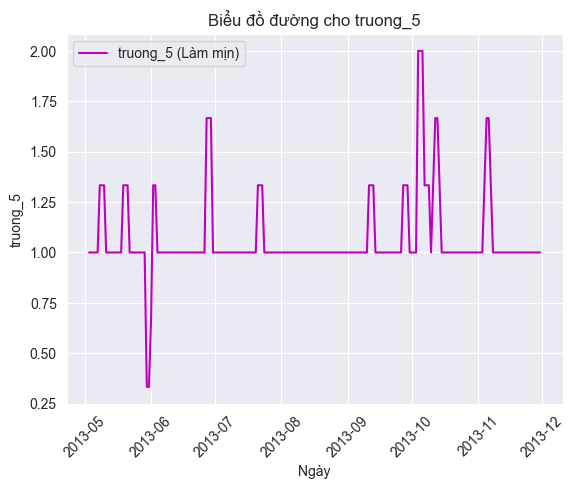

In [93]:
# Tạo danh sách màu sắc
colors = ['r', 'g', 'b', 'c', 'm']

# Vẽ biểu đồ đường cho mỗi cột
for i, col in enumerate(cols):
    plt.figure()
    
    # Làm mịn dữ liệu bằng trung bình trượt
    rolling_mean = df_mean[col].rolling(window=3).mean()
    
    plt.plot(df_mean['date'], rolling_mean, color=colors[i], label=f'{col} (Làm mịn)')
    plt.xlabel('Ngày')
    plt.ylabel(col)
    plt.title(f'Biểu đồ đường cho {col}')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

In [94]:
from statsmodels.tsa.stattools import adfuller
# Kiểm tra tính dừng bằng kiểm định Augmented Dickey-Fuller
result = adfuller(df['truong_1'])
print('Kết quả kiểm định ADF:')
print(f'Giá trị thống kê: {result[0]}')
print(f'p-value: {result[1]}')
print('Các giá trị quan sát phân phối quan sát:')
print(result[4])

# Đánh giá tính dừng dựa trên kết quả kiểm định ADF
if result[1] > 0.05:
    print('Chuỗi thời gian truong_1 không dừng (non-stationary)')
else:
    print('Chuỗi thời gian truong_1 dừng (stationary)')

Kết quả kiểm định ADF:
Giá trị thống kê: -0.5922026573600621
p-value: 0.8727341907361721
Các giá trị quan sát phân phối quan sát:
{'1%': -3.461429147102264, '5%': -2.875206950587861, '10%': -2.5740544497344002}
Chuỗi thời gian truong_1 không dừng (non-stationary)


In [95]:
# Kiểm tra tính dừng bằng kiểm định Augmented Dickey-Fuller
result = adfuller(df['truong_2'])
print('Kết quả kiểm định ADF:')
print(f'Giá trị thống kê: {result[0]}')
print(f'p-value: {result[1]}')
print('Các giá trị quan sát phân phối quan sát:')
print(result[4])

# Đánh giá tính dừng dựa trên kết quả kiểm định ADF
if result[1] > 0.05:
    print('Chuỗi thời gian truong_2 không dừng (non-stationary)')
else:
    print('Chuỗi thời gian truong_2 dừng (stationary)')

Kết quả kiểm định ADF:
Giá trị thống kê: -4.019703874966188
p-value: 0.0013107785930941555
Các giá trị quan sát phân phối quan sát:
{'1%': -3.4626576734812318, '5%': -2.8757444215841326, '10%': -2.5743412314098753}
Chuỗi thời gian truong_2 dừng (stationary)


In [96]:
# Kiểm tra tính dừng bằng kiểm định Augmented Dickey-Fuller
result = adfuller(df['truong_3'])
print('Kết quả kiểm định ADF:')
print(f'Giá trị thống kê: {result[0]}')
print(f'p-value: {result[1]}')
print('Các giá trị quan sát phân phối quan sát:')
print(result[4])

# Đánh giá tính dừng dựa trên kết quả kiểm định ADF
if result[1] > 0.05:
    print('Chuỗi thời gian truong_3 không dừng (non-stationary)')
else:
    print('Chuỗi thời gian truong_3 dừng (stationary)')

Kết quả kiểm định ADF:
Giá trị thống kê: -13.886377561809708
p-value: 6.079356828499297e-26
Các giá trị quan sát phân phối quan sát:
{'1%': -3.461429147102264, '5%': -2.875206950587861, '10%': -2.5740544497344002}
Chuỗi thời gian truong_3 dừng (stationary)


In [97]:
# Kiểm tra tính dừng bằng kiểm định Augmented Dickey-Fuller
result = adfuller(df['truong_4'])
print('Kết quả kiểm định ADF:')
print(f'Giá trị thống kê: {result[0]}')
print(f'p-value: {result[1]}')
print('Các giá trị quan sát phân phối quan sát:')
print(result[4])

# Đánh giá tính dừng dựa trên kết quả kiểm định ADF
if result[1] > 0.05:
    print('Chuỗi thời gian truong_4 không dừng (non-stationary)')
else:
    print('Chuỗi thời gian truong_4 dừng (stationary)')

Kết quả kiểm định ADF:
Giá trị thống kê: -14.865024646781128
p-value: 1.69659067651097e-27
Các giá trị quan sát phân phối quan sát:
{'1%': -3.461429147102264, '5%': -2.875206950587861, '10%': -2.5740544497344002}
Chuỗi thời gian truong_4 dừng (stationary)


In [98]:
# Kiểm tra tính dừng bằng kiểm định Augmented Dickey-Fuller
result = adfuller(df['truong_5'])
print('Kết quả kiểm định ADF:')
print(f'Giá trị thống kê: {result[0]}')
print(f'p-value: {result[1]}')
print('Các giá trị quan sát phân phối quan sát:')
print(result[4])

# Đánh giá tính dừng dựa trên kết quả kiểm định ADF
if result[1] > 0.05:
    print('Chuỗi thời gian truong_5 không dừng (non-stationary)')
else:
    print('Chuỗi thời gian truong_5 dừng (stationary)')

Kết quả kiểm định ADF:
Giá trị thống kê: -4.4526461548723075
p-value: 0.000239233714446599
Các giá trị quan sát phân phối quan sát:
{'1%': -3.4623415245233145, '5%': -2.875606128263243, '10%': -2.574267439846904}
Chuỗi thời gian truong_5 dừng (stationary)


In [100]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Tắt hoặc bỏ qua các cảnh báo
warnings.filterwarnings("ignore")

# Hàm thực hiện Grid Search cho ARIMA
def grid_search_arima(data, p_values, d_values, q_values):
    best_aic = float("inf")
    best_order = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    model = ARIMA(data, order=order)
                    results = model.fit()
                    aic = results.aic
                    if aic < best_aic:
                        best_aic = aic
                        best_order = order
                except:
                    continue
    
    return best_order

# Giá trị p, d, q để thử nghiệm
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Duyệt qua từng cột và thực hiện Grid Search
for col in cols:
    print(f"Đang tìm kiếm tham số ARIMA tốt nhất cho cột '{col}'...")
    best_order = grid_search_arima(df_mean[col], p_values, d_values, q_values)
    print(f"Tham số ARIMA tốt nhất cho cột '{col}': {best_order}")

Đang tìm kiếm tham số ARIMA tốt nhất cho cột 'truong_1'...
Tham số ARIMA tốt nhất cho cột 'truong_1': (0, 1, 0)
Đang tìm kiếm tham số ARIMA tốt nhất cho cột 'truong_2'...
Tham số ARIMA tốt nhất cho cột 'truong_2': (2, 1, 1)
Đang tìm kiếm tham số ARIMA tốt nhất cho cột 'truong_3'...
Tham số ARIMA tốt nhất cho cột 'truong_3': (0, 2, 2)
Đang tìm kiếm tham số ARIMA tốt nhất cho cột 'truong_4'...
Tham số ARIMA tốt nhất cho cột 'truong_4': (0, 2, 2)
Đang tìm kiếm tham số ARIMA tốt nhất cho cột 'truong_5'...
Tham số ARIMA tốt nhất cho cột 'truong_5': (1, 0, 1)


In [104]:
# Định nghĩa từ điển chứa các tham số ARIMA tốt nhất cho từng cột
best_orders = {
    'truong_1': (0, 1, 0),
    'truong_2': (2, 1, 1),
    'truong_3': (0, 2, 2),
    'truong_4': (0, 2, 2),
    'truong_5': (1, 0, 1)
}

# Số ngày cuối cùng để kiểm tra
test_days = 30

# Duyệt qua từng cột và xây dựng mô hình ARIMA
for col in cols:
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    train_data = df_mean[:-test_days][col]
    test_data = df_mean[-test_days:][col]
    
    # Xây dựng mô hình ARIMA với tham số tốt nhất đã xác định
    order = best_orders[col]
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    
    # Dự đoán giá trị
    forecast = fitted_model.forecast(test_days)

    # Hiển thị kết quả dự đoán
    print(f"Dự đoán cho cột '{col}':")
    print("Giá trị dự đoán:", forecast)
    print("Giá trị thực tế:", test_data.values)
    print()

Dự đoán cho cột 'truong_1':
Giá trị dự đoán: 184    9.0
185    9.0
186    9.0
187    9.0
188    9.0
189    9.0
190    9.0
191    9.0
192    9.0
193    9.0
194    9.0
195    9.0
196    9.0
197    9.0
198    9.0
199    9.0
200    9.0
201    9.0
202    9.0
203    9.0
204    9.0
205    9.0
206    9.0
207    9.0
208    9.0
209    9.0
210    9.0
211    9.0
212    9.0
213    9.0
Name: predicted_mean, dtype: float64
Giá trị thực tế: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]

Dự đoán cho cột 'truong_2':
Giá trị dự đoán: 184    33.594656
185    37.122865
186    32.557164
187    31.664946
188    32.345043
189    32.537563
190    32.440416
191    32.402336
192    32.415474
193    32.422583
194    32.420942
195    32.419672
196    32.419850
197    32.420069
198    32.420055
199    32.420019
200    32.420019
201    32.420024
202    32.420025
203    32.420024
204    32.420024
205    32.420024
206    32.420024
207    32.4

In [115]:
# Hàm tính RMSE (Root Mean Squared Error)
def calculate_rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Hàm tính MAPE (Mean Absolute Percentage Error)
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hàm tính MAE (Mean Absolute Error)
def calculate_mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Số ngày cuối cùng để kiểm tra
test_days = 30

# Duyệt qua từng cột và xây dựng mô hình ARIMA
for col in cols:
    # Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
    train_data = df_mean[:-test_days][col]
    test_data = df_mean[-test_days:][col]
    
    # Xây dựng mô hình ARIMA với tham số tốt nhất đã xác định
    order = best_orders[col]
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    
    # Dự đoán giá trị
    forecast = fitted_model.forecast(test_days)

    # Đánh giá độ chính xác của dự đoán
    rmse = calculate_rmse(test_data, forecast)
    mape = calculate_mape(test_data, forecast)
    mae = calculate_mae(test_data, forecast)

    # Hiển thị kết quả đánh giá
    print(f"Đánh giá độ chính xác cho cột '{col}':")
    print("RMSE:", rmse)
    print("MAPE:", mape)
    print("MAE:", mae)
    print()

Đánh giá độ chính xác cho cột 'truong_1':
RMSE: 1.0
MAPE: 10.000000000000004
MAE: 1.0

Đánh giá độ chính xác cho cột 'truong_2':
RMSE: 5.9068608762746555
MAPE: 19.177327749537593
MAE: 5.506058802780578

Đánh giá độ chính xác cho cột 'truong_3':
RMSE: 6789.681816209594
MAPE: 232.3953566474016
MAE: 6106.582731871468

Đánh giá độ chính xác cho cột 'truong_4':
RMSE: 898.8199971990617
MAPE: 156.40252431197257
MAE: 595.8203859175555

Đánh giá độ chính xác cho cột 'truong_5':
RMSE: 0.24933253736223818
MAPE: 9.17778582459277
MAE: 0.12292927317155697

